# TFM

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import toml
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## Ejecución de código en GPU

In [2]:
import tensorflow as tf

# Comprobar la versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Listar todos los dispositivos físicos disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):")
    for gpu in physical_devices:
        print(f'\t{gpu}')
else:
    print("🔴 No se ha detectado ninguna GPU. TensorFlow está utilizando la CPU.")

TensorFlow version: 2.10.0
🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):
	PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Lectura de fichero

In [3]:
data_dict = {}
DATA_DIR = '../../data/'

for data_folder in os.listdir(DATA_DIR):
    *data_files, config_file = os.listdir(f'{DATA_DIR}/{data_folder}')

    leak_value = toml.load(f'{DATA_DIR}/{data_folder}/{config_file}')['tanks']['flow_value']

    train_dataframe, test_dataframe = random.sample(data_files, 2)

    data_dict[data_folder] = {
        'leak_value': leak_value,
        'train_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{train_dataframe}').drop(columns=['Unnamed: 0']),
        'test_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{test_dataframe}').drop(columns=['Unnamed: 0'])
    }

### Conjuntos de datos de entrenamiento

In [4]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21060,76",-5585,"6958,22","22433,98","22364,7","-69,28","-213,88",0
1,2,"22364,7",-6145,"7053,56","23273,26","23332,72","59,46","-182,83",0
2,3,"23332,72",-6165,"7874,67","25042,39","24963,57","-78,82","-130,94",0
3,4,"24963,57",-5855,"3650,7","22759,27","22775,54","16,27","-94,01",0
4,5,"22775,54",-6020,"6527,31","23282,85","23235,8","-47,05","-104,34",0
...,...,...,...,...,...,...,...,...,...
995,996,"15390,86",-6025,"7062,64","16428,5","16374,81","-53,69","-246,44",1
996,997,"16374,81",-6400,"5748,32","15723,13","15677,62","-45,51","-353,89",1
997,998,"15677,62",-6125,"4719,72","14272,34","14356,39","84,05","-267,06",1
998,999,"14356,39",-6120,"5031,76","13268,15","13320,37","52,22","-190,72",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22430,06","-6075,0","5976,32","22331,38","22376,0","44,62","-116,83",0
1,2,"22376,0","-6065,0","3965,07","20276,07","20290,81","14,74","-45,27",0
2,3,"20290,81","-5775,0","6982,55","21498,36","21513,87","15,51","-60,91",0
3,4,"21513,87","-6035,0","6956,14","22435,01","22426,74","-8,27","5,59",0
4,5,"22426,74","-6030,0","6377,94","22774,68","22817,15","42,47","36,97",0
...,...,...,...,...,...,...,...,...,...
995,996,"2107,2","-5828,98","6463,64","2741,86","2620,44","-121,42","-167,54",1
996,997,"2620,44","-5955,0","6142,6","2808,04","2771,02","-37,02","-143,07",1
997,998,"2771,02","-5896,0","3108,82","-16,16","25,62","41,78","-150,11",1
998,999,"25,62","-5592,26","6421,37","854,73","896,61","41,88","-83,97",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22143,22","-5810,0","7001,2","23334,42","23347,02","12,6","-90,27",0
1,2,"23347,02","-6240,0","7270,93","24377,95","24283,54","-94,41","-105,27",0
2,3,"24283,54","-6430,0","3650,03","21503,57","21510,13","6,56","-17,7",0
3,4,"21510,13","-5850,0","6940,97","22601,1","22644,04","42,94","27,91",0
4,5,"22644,04","-6025,0","5910,84","22529,88","22565,92","36,04","80,35",0
...,...,...,...,...,...,...,...,...,...
995,996,"20,99","-0,0","0,0","20,99","7,38","-13,61","5,7",1
996,997,"7,38","-0,0","0,0","7,38","2,99","-4,39","-5,43",1
997,998,"2,99","-0,0","0,0","2,99","14,37","11,38","9,91",1
998,999,"14,37","-0,0","0,0","14,37","23,46","9,09","10,89",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17445,18","-5905,0","6012,94","17553,12","17533,44","-19,68","16,06",0
1,2,"17533,44","-6110,0","8506,7","19930,14","20021,08","90,94","102,33",0
2,3,"20021,08","-5930,0","4407,28","18498,36","18474,61","-23,75","162,19",0
3,4,"18474,61","-6080,0","8762,8","21157,41","21038,06","-119,35","-12,14",0
4,5,"21038,06","-6210,0","8428,75","23256,81","23192,92","-63,89","-100,6",0
...,...,...,...,...,...,...,...,...,...
995,996,"8,86","-0,0","0,0","8,86","9,4","0,54","3,9",1
996,997,"9,4","-0,0","0,0","9,4","12,79","3,39","2,6",1
997,998,"12,79","-0,0","0,0","12,79","14,69","1,9","-0,82",1
998,999,"14,69","-0,0","0,0","14,69","9,11","-5,58","-12,74",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21372,17","-5985,0","7788,9","23176,07","23214,64","38,57","19,95",0
1,2,"23214,64","-5765,0","2969,27","20418,91","20415,11","-3,8","61,14",0
2,3,"20415,11","-6325,0","7390,24","21480,35","21602,29","121,94","144,09",0
3,4,"21602,29","-6190,0","7315,88","22728,17","22691,65","-36,52","217,46",0
4,5,"22691,65","-5690,0","6031,24","23032,89","22983,03","-49,86","170,15",0
...,...,...,...,...,...,...,...,...,...
995,996,"17,19","-0,0","0,0","17,19","26,77","9,58","23,15",1
996,997,"26,77","-0,0","0,0","26,77","11,55","-15,22","10,12",1
997,998,"11,55","-0,0","0,0","11,55","1,45","-10,1","-1,74",1
998,999,"1,45","-0,0","0,0","1,45","8,2","6,75","5,73",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18283,0","-5740,0","5871,72","18414,72","18396,89","-17,83","131,0",0
1,2,"18396,89","-5840,0","9160,46","21717,35","21705,02","-12,33","136,48",0
2,3,"21705,02","-5970,0","7545,21","23280,23","23195,67","-84,56","-10,11",0
3,4,"23195,67","-6095,0","5478,44","22579,11","22659,31","80,2","33,42",0
4,5,"22659,31","-5655,0","7369,23","24373,54","24372,52","-1,02","121,38",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,56","-0,0","0,0","0,56","6,56","6,0","2,39",1
996,997,"6,56","-0,0","0,0","6,56","0,68","-5,88","-1,13",1
997,998,"0,68","-0,0","0,0","0,68","3,16","2,48","-5,51",1
998,999,"3,16","-0,0","0,0","3,16","8,1","4,94","2,05",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18314,68","-6260,0","8063,56","20118,24","20038,25","-79,99","513,51",0
1,2,"20038,25","-6220,0","7971,11","21789,36","21835,68","46,32","584,43",0
2,3,"21835,68","-6015,0","6930,57","22751,25","22777,51","26,26","444,01",0
3,4,"22777,51","-6350,0","7057,14","23484,65","23463,71","-20,94","418,39",0
4,5,"23463,71","-6020,0","3038,59","20482,3","20488,43","6,13","370,07",0
...,...,...,...,...,...,...,...,...,...
995,996,"8,72","-0,0","0,0","8,72","5,98","-2,74","-1,9",1
996,997,"5,98","-0,0","0,0","5,98","1,84","-4,14","-13,72",1
997,998,"1,84","-0,0","0,0","1,84","26,5","24,66","14,7",1
998,999,"26,5","-0,0","0,0","26,5","4,1","-22,4","0,14",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22346,15","-6290,0","6198,63","22254,78","22228,05","-26,73","261,79",0
1,2,"22228,05","-6060,0","6145,31","22313,36","22365,14","51,78","219,45",0
2,3,"22365,14","-6010,0","6925,01","23280,15","23376,91","96,76","268,96",0
3,4,"23376,91","-6115,0","6575,39","23837,3","23908,35","71,05","380,65",0
4,5,"23908,35","-5990,0","5163,72","23082,07","23139,9","57,83","395,93",0
...,...,...,...,...,...,...,...,...,...
995,996,"14,34","-0,0","0,0","14,34","8,07","-6,27","-4,93",1
996,997,"8,07","-0,0","0,0","8,07","1,01","-7,06","-0,31",1
997,998,"1,01","-0,0","0,0","1,01","0,52","-0,49","-13,79",1
998,999,"0,52","-0,0","0,0","0,52","1,03","0,51","-5,26",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18375,49","-5955,0","8014,32","20434,81","20553,39","118,58","468,67",0
1,2,"20553,39","-5980,0","8130,08","22703,47","22791,19","87,72","570,59",0
2,3,"22791,19","-6035,0","6589,31","23345,5","23363,27","17,77","520,58",0
3,4,"23363,27","-6460,0","6100,17","23003,44","22912,6","-90,84","394,26",0
4,5,"22912,6","-5760,0","6362,96","23515,56","23550,02","34,46","358,38",0
...,...,...,...,...,...,...,...,...,...
995,996,"10,85","-0,0","0,0","10,85","3,87","-6,98","0,1",1
996,997,"3,87","-0,0","0,0","3,87","5,65","1,78","5,48",1
997,998,"5,65","-0,0","0,0","5,65","3,01","-2,64","0,29",1
998,999,"3,01","-0,0","0,0","3,01","4,98","1,97","1,79",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21913,89","-5945,0","7515,72","23484,61","23445,77","-38,84","316,53",0
1,2,"23445,77","-6015,0","6155,06","23585,83","23611,02","25,19","367,02",0
2,3,"23611,02","-6270,0","5967,41","23308,43","23317,8","9,37","340,51",0
3,4,"23317,8","-5930,0","6661,08","24048,88","24071,63","22,75","432,97",0
4,5,"24071,63","-5995,0","6288,14","24364,77","24288,65","-76,12","261,87",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,8","-0,0","0,0","2,8","6,51","3,71","-6,47",1
996,997,"6,51","-0,0","0,0","6,51","2,55","-3,96","-1,8",1
997,998,"2,55","-0,0","0,0","2,55","14,83","12,28","12,92",1
998,999,"14,83","-0,0","0,0","14,83","1,26","-13,57","-0,92",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22143,65","-6055,0","6215,36","22304,01","22242,32","-61,69","34,11",0
1,2,"22242,32","-5940,0","6691,65","22993,97","22983,66","-10,31","42,41",0
2,3,"22983,66","-5885,0","6130,98","23229,64","23301,88","72,24","58,48",0
3,4,"23301,88","-6030,0","5035,77","22307,65","22270,88","-36,77","25,47",0
4,5,"22270,88","-6005,0","6518,15","22784,03","22794,42","10,39","13,96",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,74","-0,0","0,0","2,74","3,88","1,14","3,0",1
996,997,"3,88","-0,0","0,0","3,88","0,72","-3,16","-2,72",1
997,998,"0,72","-0,0","0,0","0,72","1,13","0,41","-11,02",1
998,999,"1,13","-0,0","0,0","1,13","2,14","1,01","-19,34",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18248,42","-5890,0","7012,33","19370,75","19378,62","7,87","-61,1",0
1,2,"19378,62","-5950,0","6942,62","20371,24","20411,72","40,48","-16,9",0
2,3,"20411,72","-6070,0","6945,78","21287,5","21339,7","52,2","125,63",0
3,4,"21339,7","-5970,0","7011,03","22380,73","22385,01","4,28","200,94",0
4,5,"22385,01","-5705,0","5155,21","21835,22","21881,27","46,05","298,92",0
...,...,...,...,...,...,...,...,...,...
995,996,"12,16","-0,0","0,0","12,16","1,45","-10,71","-7,61",1
996,997,"1,45","-0,0","0,0","1,45","5,94","4,49","3,09",1
997,998,"5,94","-0,0","0,0","5,94","8,7","2,76","-1,52",1
998,999,"8,7","-0,0","0,0","8,7","4,53","-4,17","-1,27",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19999,39","-5905,0","6970,79","21065,18","21102,9","37,72","109,13",0
1,2,"21102,9","-6155,0","6060,28","21008,18","20966,69","-41,49","59,33",0
2,3,"20966,69","-5975,0","2934,69","17926,38","17990,19","63,81","85,1",0
3,4,"17990,19","-6305,0","6950,94","18636,13","18679,74","43,61","127,56",0
4,5,"18679,74","-5940,0","7943,2","20682,94","20731,84","48,9","178,79",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,73","-0,0","0,0","5,73","3,13","-2,6","-19,24",1
996,997,"3,13","-0,0","0,0","3,13","3,87","0,74","-3,1",1
997,998,"3,87","-0,0","0,0","3,87","5,88","2,01","5,53",1
998,999,"5,88","-0,0","0,0","5,88","2,22","-3,66","-1,13",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14556,63","-6100,0","7672,4","16129,03","16156,68","27,65","-66,83",0
1,2,"16156,68","-5970,0","3517,74","13704,42","13714,85","10,43","-97,98",0
2,3,"13714,85","-5975,0","8581,27","16321,12","16261,92","-59,2","-126,01",0
3,4,"16261,92","-6155,0","6603,2","16710,12","16773,23","63,11","-59,66",0
4,5,"16773,23","-6065,0","5252,68","15960,91","15952,4","-8,51","20,37",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,48","-0,0","0,0","0,48","5,26","4,78","-4,23",1
996,997,"5,26","-0,0","0,0","5,26","14,41","9,15","9,68",1
997,998,"14,41","-0,0","0,0","14,41","16,94","2,53","14,11",1
998,999,"16,94","-0,0","0,0","16,94","5,52","-11,42","-3,93",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"11544,4","-5565,0","7069,47","13048,87","12982,38","-66,49","118,8",0
1,2,"12982,38","-6155,0","6953,56","13780,94","13840,48","59,54","124,42",0
2,3,"13840,48","-6005,0","8211,32","16046,8","15937,63","-109,17","-18,99",0
3,4,"15937,63","-5915,0","8550,06","18572,69","18595,78","23,09","76,99",0
4,5,"18595,78","-5830,0","6389,87","19155,65","19072,47","-83,18","-24,06",0
...,...,...,...,...,...,...,...,...,...
995,996,"16,15","-0,0","0,0","16,15","6,29","-9,86","-11,87",1
996,997,"6,29","-0,0","0,0","6,29","14,36","8,07","4,38",1
997,998,"14,36","-0,0","0,0","14,36","2,38","-11,98","-20,25",1
998,999,"2,38","-0,0","0,0","2,38","4,75","2,37","-6,32",1


### Conjunto de datos de prueba

In [5]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16932,24",-5795,"9003,66","20140,9","20147,8","6,9","194,79",0
1,2,"20147,8",-5795,"8487,37","22840,17","22824,12","-16,05","51,05",0
2,3,"22824,12",-6285,"4549,79","21088,91","21147,56","58,65","78,96",0
3,4,"21147,56",-6085,"6664,97","21727,53","21782,08","54,55","88,64",0
4,5,"21782,08",-5950,"3939,69","19771,77","19772,17","0,4","188,2",0
...,...,...,...,...,...,...,...,...,...
995,996,"17751,65",-5940,"3360,0","15171,65","15219,44","47,79","-101,62",1
996,997,"15219,44",-6110,"4412,01","13521,45","13522,52","1,07","-153,6",1
997,998,"13522,52",-6235,"7069,05","14356,57","14257,47","-99,1","-289,6",1
998,999,"14257,47",-6190,"6181,85","14249,32","14242,17","-7,15","-280,19",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14034,89","-5705,0","7013,6","15343,49","15323,45","-20,04","228,67",0
1,2,"15323,45","-5970,0","7633,39","16986,84","16980,09","-6,75","138,05",0
2,3,"16980,09","-6250,0","4594,55","15324,64","15342,95","18,31","91,74",0
3,4,"15342,95","-6375,0","7716,89","16684,84","16706,73","21,89","36,45",0
4,5,"16706,73","-6020,0","7060,35","17747,08","17712,72","-34,36","101,33",0
...,...,...,...,...,...,...,...,...,...
995,996,"2480,65","-5740,0","5618,89","2359,54","2424,72","65,18","115,61",1
996,997,"2424,72","-5725,0","6292,34","2992,06","2952,52","-39,54","66,08",1
997,998,"2952,52","-5377,62","2403,34","-21,76","8,21","29,97","58,91",1
998,999,"8,21","-5756,65","6559,47","811,03","872,06","61,03","81,69",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20423,93","-5590,0","5813,6","20647,53","20665,41","17,88","31,64",0
1,2,"20665,41","-5970,0","5997,78","20693,19","20680,86","-12,33","79,51",0
2,3,"20680,86","-5930,0","7951,68","22702,54","22757,13","54,59","150,95",0
3,4,"22757,13","-6260,0","6680,1","23177,23","23197,64","20,41","107,33",0
4,5,"23197,64","-6075,0","5816,09","22938,73","22983,34","44,61","181,99",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,36","-0,0","0,0","2,36","14,55","12,19","2,84",1
996,997,"14,55","-0,0","0,0","14,55","4,86","-9,69","-1,12",1
997,998,"4,86","-0,0","0,0","4,86","0,46","-4,4","0,26",1
998,999,"0,46","-0,0","0,0","0,46","11,22","10,76","-9,79",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21287,51","-6070,0","7042,91","22260,42","22216,71","-43,71","188,2",0
1,2,"22216,71","-6065,0","4682,57","20834,28","20856,74","22,46","259,79",0
2,3,"20856,74","-6035,0","7234,09","22055,83","22134,3","78,47","272,27",0
3,4,"22134,3","-6120,0","5847,84","21862,14","22001,79","139,65","380,74",0
4,5,"22001,79","-5605,0","3757,23","20154,02","20186,77","32,75","279,92",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,31","-0,0","0,0","3,31","4,22","0,91","-5,75",1
996,997,"4,22","-0,0","0,0","4,22","14,3","10,08","7,99",1
997,998,"14,3","-0,0","0,0","14,3","12,66","-1,64","10,33",1
998,999,"12,66","-0,0","0,0","12,66","2,96","-9,7","-1,54",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20535,61","-5940,0","8641,12","23236,73","23294,75","58,02","265,22",0
1,2,"23294,75","-6575,0","6455,26","23175,01","23296,05","121,04","387,15",0
2,3,"23296,05","-5630,0","6600,92","24266,97","24325,7","58,73","366,14",0
3,4,"24325,7","-6015,0","3190,31","21501,01","21523,46","22,45","375,09",0
4,5,"21523,46","-5695,0","7376,83","23205,29","23238,07","32,78","376,68",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,69","-0,0","0,0","3,69","23,8","20,11","18,39",1
996,997,"23,8","-0,0","0,0","23,8","15,45","-8,35","12,43",1
997,998,"15,45","-0,0","0,0","15,45","10,85","-4,6","-0,6",1
998,999,"10,85","-0,0","0,0","10,85","3,49","-7,36","-0,14",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20926,01","-6330,0","7936,74","22532,75","22555,94","23,19","305,48",0
1,2,"22555,94","-5905,0","3348,49","19999,43","20111,82","112,39","503,47",0
2,3,"20111,82","-6245,0","6923,21","20790,03","20855,37","65,34","514,15",0
3,4,"20855,37","-5905,0","7053,86","22004,23","21964,05","-40,18","343,39",0
4,5,"21964,05","-6135,0","3675,69","19504,74","19539,13","34,39","420,04",0
...,...,...,...,...,...,...,...,...,...
995,996,"12,08","-0,0","0,0","12,08","4,19","-7,89","-15,43",1
996,997,"4,19","-0,0","0,0","4,19","5,77","1,58","-4,71",1
997,998,"5,77","-0,0","0,0","5,77","10,56","4,79","9,99",1
998,999,"10,56","-0,0","0,0","10,56","2,91","-7,65","-3,23",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19740,03","-5920,0","10305,52","24125,55","24176,62","51,07","306,45",0
1,2,"24176,62","-6015,0","3018,53","21180,15","21184,86","4,71","273,95",0
2,3,"21184,86","-5815,0","6534,34","21904,2","21949,08","44,88","293,49",0
3,4,"21949,08","-5725,0","7502,0","23726,08","23762,94","36,86","298,66",0
4,5,"23762,94","-6060,0","4710,68","22413,62","22440,19","26,57","297,24",0
...,...,...,...,...,...,...,...,...,...
995,996,"9,35","-0,0","0,0","9,35","8,41","-0,94","6,29",1
996,997,"8,41","-0,0","0,0","8,41","0,15","-8,26","-0,48",1
997,998,"0,15","-0,0","0,0","0,15","5,66","5,51","2,92",1
998,999,"5,66","-0,0","0,0","5,66","18,47","12,81","1,72",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20243,13","-5965,0","7985,87","22264,0","22278,4","14,4","181,64",0
1,2,"22278,4","-6175,0","6863,82","22967,22","22984,84","17,62","158,55",0
2,3,"22984,84","-6185,0","6517,27","23317,11","23354,87","37,76","255,01",0
3,4,"23354,87","-5855,0","5209,27","22709,14","22651,18","-57,96","184,76",0
4,5,"22651,18","-5890,0","6124,91","22886,09","22981,27","95,18","194,59",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,77","-0,0","0,0","1,77","2,07","0,3","-2,85",1
996,997,"2,07","-0,0","0,0","2,07","10,87","8,8","-1,72",1
997,998,"10,87","-0,0","0,0","10,87","7,09","-3,78","-0,4",1
998,999,"7,09","-0,0","0,0","7,09","19,21","12,12","14,47",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16476,77","-6180,0","6085,35","16382,12","16294,6","-87,52","85,31",0
1,2,"16294,6","-5755,0","5556,17","16095,77","16020,9","-74,87","45,35",0
2,3,"16020,9","-5935,0","5415,9","15501,8","15611,4","109,6","202,67",0
3,4,"15611,4","-6210,0","6965,5","16366,9","16409,97","43,07","279,04",0
4,5,"16409,97","-5855,0","7988,67","18543,64","18564,14","20,5","267,66",0
...,...,...,...,...,...,...,...,...,...
995,996,"10,5","-0,0","0,0","10,5","21,97","11,47","6,0",1
996,997,"21,97","-0,0","0,0","21,97","8,59","-13,38","-1,76",1
997,998,"8,59","-0,0","0,0","8,59","3,21","-5,38","-5,72",1
998,999,"3,21","-0,0","0,0","3,21","8,53","5,32","5,06",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20883,57","-6090,0","5235,88","20029,45","20091,97","62,52","466,98",0
1,2,"20091,97","-5700,0","7679,54","22071,51","22100,09","28,58","493,72",0
2,3,"22100,09","-6025,0","8386,81","24461,9","24424,54","-37,36","413,04",0
3,4,"24424,54","-5920,0","6459,08","24963,62","24947,48","-16,14","431,6",0
4,5,"24947,48","-6245,0","3911,32","22613,8","22599,34","-14,46","420,22",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,55","-0,0","0,0","5,55","2,64","-2,91","-15,2",1
996,997,"2,64","-0,0","0,0","2,64","9,87","7,23","6,53",1
997,998,"9,87","-0,0","0,0","9,87","3,25","-6,62","-5,97",1
998,999,"3,25","-0,0","0,0","3,25","28,01","24,76","17,93",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21317,46","-5990,0","2968,12","18295,58","18323,64","28,06","-82,57",0
1,2,"18323,64","-6255,0","6219,19","18287,83","18284,2","-3,63","-120,57",0
2,3,"18284,2","-5830,0","5794,24","18248,44","18235,2","-13,24","18,69",0
3,4,"18235,2","-5855,0","6994,57","19374,77","19380,49","5,72","13,79",0
4,5,"19380,49","-6320,0","6978,26","20038,75","20051,59","12,84","35,39",0
...,...,...,...,...,...,...,...,...,...
995,996,"4,53","-0,0","0,0","4,53","4,38","-0,15","-0,18",1
996,997,"4,38","-0,0","0,0","4,38","21,36","16,98","10,55",1
997,998,"21,36","-0,0","0,0","21,36","15,47","-5,89","6,24",1
998,999,"15,47","-0,0","0,0","15,47","11,43","-4,04","11,26",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15886,17","-5900,0","5970,3","15956,47","15980,01","23,54","68,46",0
1,2,"15980,01","-5810,0","6050,74","16220,75","16175,65","-45,1","8,64",0
2,3,"16175,65","-5760,0","5917,51","16333,16","16413,96","80,8","17,3",0
3,4,"16413,96","-5970,0","6982,8","17426,76","17460,02","33,26","68,23",0
4,5,"17460,02","-6340,0","7929,64","19049,66","19111,41","61,75","52,84",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,52","-0,0","0,0","5,52","0,47","-5,05","-4,84",1
996,997,"0,47","-0,0","0,0","0,47","5,79","5,32","0,68",1
997,998,"5,79","-0,0","0,0","5,79","14,14","8,35","-0,25",1
998,999,"14,14","-0,0","0,0","14,14","4,73","-9,41","2,66",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15272,5","-6010,0","10030,29","19292,79","19280,8","-11,99","292,48",0
1,2,"19280,8","-6205,0","3984,78","17060,58","17094,5","33,92","305,91",0
2,3,"17094,5","-5995,0","7951,55","19051,05","19091,82","40,77","164,52",0
3,4,"19091,82","-6255,0","3983,16","16819,98","16872,08","52,1","215,19",0
4,5,"16872,08","-5965,0","8512,19","19419,27","19433,93","14,66","140,65",0
...,...,...,...,...,...,...,...,...,...
995,996,"16,81","-0,0","0,0","16,81","4,18","-12,63","-0,89",1
996,997,"4,18","-0,0","0,0","4,18","10,01","5,83","5,26",1
997,998,"10,01","-0,0","0,0","10,01","6,14","-3,87","-0,29",1
998,999,"6,14","-0,0","0,0","6,14","14,1","7,96","2,67",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17698,38","-5710,0","4618,64","16607,02","16580,51","-26,51","35,66",0
1,2,"16580,51","-5875,0","6004,3","16709,81","16702,31","-7,5","58,61",0
2,3,"16702,31","-6250,0","8001,28","18453,59","18456,14","2,55","-9,07",0
3,4,"18456,14","-5870,0","6931,83","19517,97","19595,08","77,11","-16,24",0
4,5,"19595,08","-6330,0","7449,42","20714,5","20644,03","-70,47","-108,89",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,11","-0,0","0,0","1,11","1,53","0,42","-12,95",1
996,997,"1,53","-0,0","0,0","1,53","5,18","3,65","0,97",1
997,998,"5,18","-0,0","0,0","5,18","9,61","4,43","9,4",1
998,999,"9,61","-0,0","0,0","9,61","13,39","3,78","3,06",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22379,58","-5785,0","5690,39","22284,97","22319,5","34,53","144,59",0
1,2,"22319,5","-5980,0","6499,32","22838,82","22799,39","-39,43","171,58",0
2,3,"22799,39","-6000,0","6305,86","23105,25","23145,46","40,21","213,48",0
3,4,"23145,46","-6095,0","5814,71","22865,17","22845,93","-19,24","195,21",0
4,5,"22845,93","-6145,0","6270,76","22971,69","22978,1","6,41","290,05",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,71","-0,0","0,0","2,71","2,61","-0,1","-0,48",1
996,997,"2,61","-0,0","0,0","2,61","5,93","3,32","1,85",1
997,998,"5,93","-0,0","0,0","5,93","13,8","7,87","5,27",1
998,999,"13,8","-0,0","0,0","13,8","6,1","-7,7","-0,73",1


## Limpieza de datos

In [6]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        for field in bad_formatted_fields:
            data_dict[case][dataset][field] = data_dict[case][dataset][field].str.replace(',', '.')
            data_dict[case][dataset][field] = pd.to_numeric(data_dict[case][dataset][field])

### Conjunto de datos de entrenamiento

In [7]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21060.76,-5585,6958.22,22433.98,22364.70,-69.28,-213.88,0
1,2,22364.70,-6145,7053.56,23273.26,23332.72,59.46,-182.83,0
2,3,23332.72,-6165,7874.67,25042.39,24963.57,-78.82,-130.94,0
3,4,24963.57,-5855,3650.70,22759.27,22775.54,16.27,-94.01,0
4,5,22775.54,-6020,6527.31,23282.85,23235.80,-47.05,-104.34,0
...,...,...,...,...,...,...,...,...,...
995,996,15390.86,-6025,7062.64,16428.50,16374.81,-53.69,-246.44,1
996,997,16374.81,-6400,5748.32,15723.13,15677.62,-45.51,-353.89,1
997,998,15677.62,-6125,4719.72,14272.34,14356.39,84.05,-267.06,1
998,999,14356.39,-6120,5031.76,13268.15,13320.37,52.22,-190.72,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22430.06,"-6075,0",5976.32,22331.38,22376.00,44.62,-116.83,0
1,2,22376.00,"-6065,0",3965.07,20276.07,20290.81,14.74,-45.27,0
2,3,20290.81,"-5775,0",6982.55,21498.36,21513.87,15.51,-60.91,0
3,4,21513.87,"-6035,0",6956.14,22435.01,22426.74,-8.27,5.59,0
4,5,22426.74,"-6030,0",6377.94,22774.68,22817.15,42.47,36.97,0
...,...,...,...,...,...,...,...,...,...
995,996,2107.20,"-5828,98",6463.64,2741.86,2620.44,-121.42,-167.54,1
996,997,2620.44,"-5955,0",6142.60,2808.04,2771.02,-37.02,-143.07,1
997,998,2771.02,"-5896,0",3108.82,-16.16,25.62,41.78,-150.11,1
998,999,25.62,"-5592,26",6421.37,854.73,896.61,41.88,-83.97,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22143.22,"-5810,0",7001.20,23334.42,23347.02,12.60,-90.27,0
1,2,23347.02,"-6240,0",7270.93,24377.95,24283.54,-94.41,-105.27,0
2,3,24283.54,"-6430,0",3650.03,21503.57,21510.13,6.56,-17.70,0
3,4,21510.13,"-5850,0",6940.97,22601.10,22644.04,42.94,27.91,0
4,5,22644.04,"-6025,0",5910.84,22529.88,22565.92,36.04,80.35,0
...,...,...,...,...,...,...,...,...,...
995,996,20.99,"-0,0",0.00,20.99,7.38,-13.61,5.70,1
996,997,7.38,"-0,0",0.00,7.38,2.99,-4.39,-5.43,1
997,998,2.99,"-0,0",0.00,2.99,14.37,11.38,9.91,1
998,999,14.37,"-0,0",0.00,14.37,23.46,9.09,10.89,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17445.18,"-5905,0",6012.94,17553.12,17533.44,-19.68,16.06,0
1,2,17533.44,"-6110,0",8506.70,19930.14,20021.08,90.94,102.33,0
2,3,20021.08,"-5930,0",4407.28,18498.36,18474.61,-23.75,162.19,0
3,4,18474.61,"-6080,0",8762.80,21157.41,21038.06,-119.35,-12.14,0
4,5,21038.06,"-6210,0",8428.75,23256.81,23192.92,-63.89,-100.60,0
...,...,...,...,...,...,...,...,...,...
995,996,8.86,"-0,0",0.00,8.86,9.40,0.54,3.90,1
996,997,9.40,"-0,0",0.00,9.40,12.79,3.39,2.60,1
997,998,12.79,"-0,0",0.00,12.79,14.69,1.90,-0.82,1
998,999,14.69,"-0,0",0.00,14.69,9.11,-5.58,-12.74,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21372.17,"-5985,0",7788.90,23176.07,23214.64,38.57,19.95,0
1,2,23214.64,"-5765,0",2969.27,20418.91,20415.11,-3.80,61.14,0
2,3,20415.11,"-6325,0",7390.24,21480.35,21602.29,121.94,144.09,0
3,4,21602.29,"-6190,0",7315.88,22728.17,22691.65,-36.52,217.46,0
4,5,22691.65,"-5690,0",6031.24,23032.89,22983.03,-49.86,170.15,0
...,...,...,...,...,...,...,...,...,...
995,996,17.19,"-0,0",0.00,17.19,26.77,9.58,23.15,1
996,997,26.77,"-0,0",0.00,26.77,11.55,-15.22,10.12,1
997,998,11.55,"-0,0",0.00,11.55,1.45,-10.10,-1.74,1
998,999,1.45,"-0,0",0.00,1.45,8.20,6.75,5.73,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18283.00,"-5740,0",5871.72,18414.72,18396.89,-17.83,131.00,0
1,2,18396.89,"-5840,0",9160.46,21717.35,21705.02,-12.33,136.48,0
2,3,21705.02,"-5970,0",7545.21,23280.23,23195.67,-84.56,-10.11,0
3,4,23195.67,"-6095,0",5478.44,22579.11,22659.31,80.20,33.42,0
4,5,22659.31,"-5655,0",7369.23,24373.54,24372.52,-1.02,121.38,0
...,...,...,...,...,...,...,...,...,...
995,996,0.56,"-0,0",0.00,0.56,6.56,6.00,2.39,1
996,997,6.56,"-0,0",0.00,6.56,0.68,-5.88,-1.13,1
997,998,0.68,"-0,0",0.00,0.68,3.16,2.48,-5.51,1
998,999,3.16,"-0,0",0.00,3.16,8.10,4.94,2.05,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18314.68,"-6260,0",8063.56,20118.24,20038.25,-79.99,513.51,0
1,2,20038.25,"-6220,0",7971.11,21789.36,21835.68,46.32,584.43,0
2,3,21835.68,"-6015,0",6930.57,22751.25,22777.51,26.26,444.01,0
3,4,22777.51,"-6350,0",7057.14,23484.65,23463.71,-20.94,418.39,0
4,5,23463.71,"-6020,0",3038.59,20482.30,20488.43,6.13,370.07,0
...,...,...,...,...,...,...,...,...,...
995,996,8.72,"-0,0",0.00,8.72,5.98,-2.74,-1.90,1
996,997,5.98,"-0,0",0.00,5.98,1.84,-4.14,-13.72,1
997,998,1.84,"-0,0",0.00,1.84,26.50,24.66,14.70,1
998,999,26.50,"-0,0",0.00,26.50,4.10,-22.40,0.14,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22346.15,"-6290,0",6198.63,22254.78,22228.05,-26.73,261.79,0
1,2,22228.05,"-6060,0",6145.31,22313.36,22365.14,51.78,219.45,0
2,3,22365.14,"-6010,0",6925.01,23280.15,23376.91,96.76,268.96,0
3,4,23376.91,"-6115,0",6575.39,23837.30,23908.35,71.05,380.65,0
4,5,23908.35,"-5990,0",5163.72,23082.07,23139.90,57.83,395.93,0
...,...,...,...,...,...,...,...,...,...
995,996,14.34,"-0,0",0.00,14.34,8.07,-6.27,-4.93,1
996,997,8.07,"-0,0",0.00,8.07,1.01,-7.06,-0.31,1
997,998,1.01,"-0,0",0.00,1.01,0.52,-0.49,-13.79,1
998,999,0.52,"-0,0",0.00,0.52,1.03,0.51,-5.26,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18375.49,"-5955,0",8014.32,20434.81,20553.39,118.58,468.67,0
1,2,20553.39,"-5980,0",8130.08,22703.47,22791.19,87.72,570.59,0
2,3,22791.19,"-6035,0",6589.31,23345.50,23363.27,17.77,520.58,0
3,4,23363.27,"-6460,0",6100.17,23003.44,22912.60,-90.84,394.26,0
4,5,22912.60,"-5760,0",6362.96,23515.56,23550.02,34.46,358.38,0
...,...,...,...,...,...,...,...,...,...
995,996,10.85,"-0,0",0.00,10.85,3.87,-6.98,0.10,1
996,997,3.87,"-0,0",0.00,3.87,5.65,1.78,5.48,1
997,998,5.65,"-0,0",0.00,5.65,3.01,-2.64,0.29,1
998,999,3.01,"-0,0",0.00,3.01,4.98,1.97,1.79,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21913.89,"-5945,0",7515.72,23484.61,23445.77,-38.84,316.53,0
1,2,23445.77,"-6015,0",6155.06,23585.83,23611.02,25.19,367.02,0
2,3,23611.02,"-6270,0",5967.41,23308.43,23317.80,9.37,340.51,0
3,4,23317.80,"-5930,0",6661.08,24048.88,24071.63,22.75,432.97,0
4,5,24071.63,"-5995,0",6288.14,24364.77,24288.65,-76.12,261.87,0
...,...,...,...,...,...,...,...,...,...
995,996,2.80,"-0,0",0.00,2.80,6.51,3.71,-6.47,1
996,997,6.51,"-0,0",0.00,6.51,2.55,-3.96,-1.80,1
997,998,2.55,"-0,0",0.00,2.55,14.83,12.28,12.92,1
998,999,14.83,"-0,0",0.00,14.83,1.26,-13.57,-0.92,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22143.65,"-6055,0",6215.36,22304.01,22242.32,-61.69,34.11,0
1,2,22242.32,"-5940,0",6691.65,22993.97,22983.66,-10.31,42.41,0
2,3,22983.66,"-5885,0",6130.98,23229.64,23301.88,72.24,58.48,0
3,4,23301.88,"-6030,0",5035.77,22307.65,22270.88,-36.77,25.47,0
4,5,22270.88,"-6005,0",6518.15,22784.03,22794.42,10.39,13.96,0
...,...,...,...,...,...,...,...,...,...
995,996,2.74,"-0,0",0.00,2.74,3.88,1.14,3.00,1
996,997,3.88,"-0,0",0.00,3.88,0.72,-3.16,-2.72,1
997,998,0.72,"-0,0",0.00,0.72,1.13,0.41,-11.02,1
998,999,1.13,"-0,0",0.00,1.13,2.14,1.01,-19.34,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18248.42,"-5890,0",7012.33,19370.75,19378.62,7.87,-61.10,0
1,2,19378.62,"-5950,0",6942.62,20371.24,20411.72,40.48,-16.90,0
2,3,20411.72,"-6070,0",6945.78,21287.50,21339.70,52.20,125.63,0
3,4,21339.70,"-5970,0",7011.03,22380.73,22385.01,4.28,200.94,0
4,5,22385.01,"-5705,0",5155.21,21835.22,21881.27,46.05,298.92,0
...,...,...,...,...,...,...,...,...,...
995,996,12.16,"-0,0",0.00,12.16,1.45,-10.71,-7.61,1
996,997,1.45,"-0,0",0.00,1.45,5.94,4.49,3.09,1
997,998,5.94,"-0,0",0.00,5.94,8.70,2.76,-1.52,1
998,999,8.70,"-0,0",0.00,8.70,4.53,-4.17,-1.27,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19999.39,"-5905,0",6970.79,21065.18,21102.90,37.72,109.13,0
1,2,21102.90,"-6155,0",6060.28,21008.18,20966.69,-41.49,59.33,0
2,3,20966.69,"-5975,0",2934.69,17926.38,17990.19,63.81,85.10,0
3,4,17990.19,"-6305,0",6950.94,18636.13,18679.74,43.61,127.56,0
4,5,18679.74,"-5940,0",7943.20,20682.94,20731.84,48.90,178.79,0
...,...,...,...,...,...,...,...,...,...
995,996,5.73,"-0,0",0.00,5.73,3.13,-2.60,-19.24,1
996,997,3.13,"-0,0",0.00,3.13,3.87,0.74,-3.10,1
997,998,3.87,"-0,0",0.00,3.87,5.88,2.01,5.53,1
998,999,5.88,"-0,0",0.00,5.88,2.22,-3.66,-1.13,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14556.63,"-6100,0",7672.40,16129.03,16156.68,27.65,-66.83,0
1,2,16156.68,"-5970,0",3517.74,13704.42,13714.85,10.43,-97.98,0
2,3,13714.85,"-5975,0",8581.27,16321.12,16261.92,-59.20,-126.01,0
3,4,16261.92,"-6155,0",6603.20,16710.12,16773.23,63.11,-59.66,0
4,5,16773.23,"-6065,0",5252.68,15960.91,15952.40,-8.51,20.37,0
...,...,...,...,...,...,...,...,...,...
995,996,0.48,"-0,0",0.00,0.48,5.26,4.78,-4.23,1
996,997,5.26,"-0,0",0.00,5.26,14.41,9.15,9.68,1
997,998,14.41,"-0,0",0.00,14.41,16.94,2.53,14.11,1
998,999,16.94,"-0,0",0.00,16.94,5.52,-11.42,-3.93,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,11544.40,"-5565,0",7069.47,13048.87,12982.38,-66.49,118.80,0
1,2,12982.38,"-6155,0",6953.56,13780.94,13840.48,59.54,124.42,0
2,3,13840.48,"-6005,0",8211.32,16046.80,15937.63,-109.17,-18.99,0
3,4,15937.63,"-5915,0",8550.06,18572.69,18595.78,23.09,76.99,0
4,5,18595.78,"-5830,0",6389.87,19155.65,19072.47,-83.18,-24.06,0
...,...,...,...,...,...,...,...,...,...
995,996,16.15,"-0,0",0.00,16.15,6.29,-9.86,-11.87,1
996,997,6.29,"-0,0",0.00,6.29,14.36,8.07,4.38,1
997,998,14.36,"-0,0",0.00,14.36,2.38,-11.98,-20.25,1
998,999,2.38,"-0,0",0.00,2.38,4.75,2.37,-6.32,1


### Conjunto de datos de prueba

In [8]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16932.24,-5795,9003.66,20140.90,20147.80,6.90,194.79,0
1,2,20147.80,-5795,8487.37,22840.17,22824.12,-16.05,51.05,0
2,3,22824.12,-6285,4549.79,21088.91,21147.56,58.65,78.96,0
3,4,21147.56,-6085,6664.97,21727.53,21782.08,54.55,88.64,0
4,5,21782.08,-5950,3939.69,19771.77,19772.17,0.40,188.20,0
...,...,...,...,...,...,...,...,...,...
995,996,17751.65,-5940,3360.00,15171.65,15219.44,47.79,-101.62,1
996,997,15219.44,-6110,4412.01,13521.45,13522.52,1.07,-153.60,1
997,998,13522.52,-6235,7069.05,14356.57,14257.47,-99.10,-289.60,1
998,999,14257.47,-6190,6181.85,14249.32,14242.17,-7.15,-280.19,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14034.89,"-5705,0",7013.60,15343.49,15323.45,-20.04,228.67,0
1,2,15323.45,"-5970,0",7633.39,16986.84,16980.09,-6.75,138.05,0
2,3,16980.09,"-6250,0",4594.55,15324.64,15342.95,18.31,91.74,0
3,4,15342.95,"-6375,0",7716.89,16684.84,16706.73,21.89,36.45,0
4,5,16706.73,"-6020,0",7060.35,17747.08,17712.72,-34.36,101.33,0
...,...,...,...,...,...,...,...,...,...
995,996,2480.65,"-5740,0",5618.89,2359.54,2424.72,65.18,115.61,1
996,997,2424.72,"-5725,0",6292.34,2992.06,2952.52,-39.54,66.08,1
997,998,2952.52,"-5377,62",2403.34,-21.76,8.21,29.97,58.91,1
998,999,8.21,"-5756,65",6559.47,811.03,872.06,61.03,81.69,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20423.93,"-5590,0",5813.60,20647.53,20665.41,17.88,31.64,0
1,2,20665.41,"-5970,0",5997.78,20693.19,20680.86,-12.33,79.51,0
2,3,20680.86,"-5930,0",7951.68,22702.54,22757.13,54.59,150.95,0
3,4,22757.13,"-6260,0",6680.10,23177.23,23197.64,20.41,107.33,0
4,5,23197.64,"-6075,0",5816.09,22938.73,22983.34,44.61,181.99,0
...,...,...,...,...,...,...,...,...,...
995,996,2.36,"-0,0",0.00,2.36,14.55,12.19,2.84,1
996,997,14.55,"-0,0",0.00,14.55,4.86,-9.69,-1.12,1
997,998,4.86,"-0,0",0.00,4.86,0.46,-4.40,0.26,1
998,999,0.46,"-0,0",0.00,0.46,11.22,10.76,-9.79,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21287.51,"-6070,0",7042.91,22260.42,22216.71,-43.71,188.20,0
1,2,22216.71,"-6065,0",4682.57,20834.28,20856.74,22.46,259.79,0
2,3,20856.74,"-6035,0",7234.09,22055.83,22134.30,78.47,272.27,0
3,4,22134.30,"-6120,0",5847.84,21862.14,22001.79,139.65,380.74,0
4,5,22001.79,"-5605,0",3757.23,20154.02,20186.77,32.75,279.92,0
...,...,...,...,...,...,...,...,...,...
995,996,3.31,"-0,0",0.00,3.31,4.22,0.91,-5.75,1
996,997,4.22,"-0,0",0.00,4.22,14.30,10.08,7.99,1
997,998,14.30,"-0,0",0.00,14.30,12.66,-1.64,10.33,1
998,999,12.66,"-0,0",0.00,12.66,2.96,-9.70,-1.54,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20535.61,"-5940,0",8641.12,23236.73,23294.75,58.02,265.22,0
1,2,23294.75,"-6575,0",6455.26,23175.01,23296.05,121.04,387.15,0
2,3,23296.05,"-5630,0",6600.92,24266.97,24325.70,58.73,366.14,0
3,4,24325.70,"-6015,0",3190.31,21501.01,21523.46,22.45,375.09,0
4,5,21523.46,"-5695,0",7376.83,23205.29,23238.07,32.78,376.68,0
...,...,...,...,...,...,...,...,...,...
995,996,3.69,"-0,0",0.00,3.69,23.80,20.11,18.39,1
996,997,23.80,"-0,0",0.00,23.80,15.45,-8.35,12.43,1
997,998,15.45,"-0,0",0.00,15.45,10.85,-4.60,-0.60,1
998,999,10.85,"-0,0",0.00,10.85,3.49,-7.36,-0.14,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20926.01,"-6330,0",7936.74,22532.75,22555.94,23.19,305.48,0
1,2,22555.94,"-5905,0",3348.49,19999.43,20111.82,112.39,503.47,0
2,3,20111.82,"-6245,0",6923.21,20790.03,20855.37,65.34,514.15,0
3,4,20855.37,"-5905,0",7053.86,22004.23,21964.05,-40.18,343.39,0
4,5,21964.05,"-6135,0",3675.69,19504.74,19539.13,34.39,420.04,0
...,...,...,...,...,...,...,...,...,...
995,996,12.08,"-0,0",0.00,12.08,4.19,-7.89,-15.43,1
996,997,4.19,"-0,0",0.00,4.19,5.77,1.58,-4.71,1
997,998,5.77,"-0,0",0.00,5.77,10.56,4.79,9.99,1
998,999,10.56,"-0,0",0.00,10.56,2.91,-7.65,-3.23,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19740.03,"-5920,0",10305.52,24125.55,24176.62,51.07,306.45,0
1,2,24176.62,"-6015,0",3018.53,21180.15,21184.86,4.71,273.95,0
2,3,21184.86,"-5815,0",6534.34,21904.20,21949.08,44.88,293.49,0
3,4,21949.08,"-5725,0",7502.00,23726.08,23762.94,36.86,298.66,0
4,5,23762.94,"-6060,0",4710.68,22413.62,22440.19,26.57,297.24,0
...,...,...,...,...,...,...,...,...,...
995,996,9.35,"-0,0",0.00,9.35,8.41,-0.94,6.29,1
996,997,8.41,"-0,0",0.00,8.41,0.15,-8.26,-0.48,1
997,998,0.15,"-0,0",0.00,0.15,5.66,5.51,2.92,1
998,999,5.66,"-0,0",0.00,5.66,18.47,12.81,1.72,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20243.13,"-5965,0",7985.87,22264.00,22278.40,14.40,181.64,0
1,2,22278.40,"-6175,0",6863.82,22967.22,22984.84,17.62,158.55,0
2,3,22984.84,"-6185,0",6517.27,23317.11,23354.87,37.76,255.01,0
3,4,23354.87,"-5855,0",5209.27,22709.14,22651.18,-57.96,184.76,0
4,5,22651.18,"-5890,0",6124.91,22886.09,22981.27,95.18,194.59,0
...,...,...,...,...,...,...,...,...,...
995,996,1.77,"-0,0",0.00,1.77,2.07,0.30,-2.85,1
996,997,2.07,"-0,0",0.00,2.07,10.87,8.80,-1.72,1
997,998,10.87,"-0,0",0.00,10.87,7.09,-3.78,-0.40,1
998,999,7.09,"-0,0",0.00,7.09,19.21,12.12,14.47,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16476.77,"-6180,0",6085.35,16382.12,16294.60,-87.52,85.31,0
1,2,16294.60,"-5755,0",5556.17,16095.77,16020.90,-74.87,45.35,0
2,3,16020.90,"-5935,0",5415.90,15501.80,15611.40,109.60,202.67,0
3,4,15611.40,"-6210,0",6965.50,16366.90,16409.97,43.07,279.04,0
4,5,16409.97,"-5855,0",7988.67,18543.64,18564.14,20.50,267.66,0
...,...,...,...,...,...,...,...,...,...
995,996,10.50,"-0,0",0.00,10.50,21.97,11.47,6.00,1
996,997,21.97,"-0,0",0.00,21.97,8.59,-13.38,-1.76,1
997,998,8.59,"-0,0",0.00,8.59,3.21,-5.38,-5.72,1
998,999,3.21,"-0,0",0.00,3.21,8.53,5.32,5.06,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20883.57,"-6090,0",5235.88,20029.45,20091.97,62.52,466.98,0
1,2,20091.97,"-5700,0",7679.54,22071.51,22100.09,28.58,493.72,0
2,3,22100.09,"-6025,0",8386.81,24461.90,24424.54,-37.36,413.04,0
3,4,24424.54,"-5920,0",6459.08,24963.62,24947.48,-16.14,431.60,0
4,5,24947.48,"-6245,0",3911.32,22613.80,22599.34,-14.46,420.22,0
...,...,...,...,...,...,...,...,...,...
995,996,5.55,"-0,0",0.00,5.55,2.64,-2.91,-15.20,1
996,997,2.64,"-0,0",0.00,2.64,9.87,7.23,6.53,1
997,998,9.87,"-0,0",0.00,9.87,3.25,-6.62,-5.97,1
998,999,3.25,"-0,0",0.00,3.25,28.01,24.76,17.93,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21317.46,"-5990,0",2968.12,18295.58,18323.64,28.06,-82.57,0
1,2,18323.64,"-6255,0",6219.19,18287.83,18284.20,-3.63,-120.57,0
2,3,18284.20,"-5830,0",5794.24,18248.44,18235.20,-13.24,18.69,0
3,4,18235.20,"-5855,0",6994.57,19374.77,19380.49,5.72,13.79,0
4,5,19380.49,"-6320,0",6978.26,20038.75,20051.59,12.84,35.39,0
...,...,...,...,...,...,...,...,...,...
995,996,4.53,"-0,0",0.00,4.53,4.38,-0.15,-0.18,1
996,997,4.38,"-0,0",0.00,4.38,21.36,16.98,10.55,1
997,998,21.36,"-0,0",0.00,21.36,15.47,-5.89,6.24,1
998,999,15.47,"-0,0",0.00,15.47,11.43,-4.04,11.26,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15886.17,"-5900,0",5970.30,15956.47,15980.01,23.54,68.46,0
1,2,15980.01,"-5810,0",6050.74,16220.75,16175.65,-45.10,8.64,0
2,3,16175.65,"-5760,0",5917.51,16333.16,16413.96,80.80,17.30,0
3,4,16413.96,"-5970,0",6982.80,17426.76,17460.02,33.26,68.23,0
4,5,17460.02,"-6340,0",7929.64,19049.66,19111.41,61.75,52.84,0
...,...,...,...,...,...,...,...,...,...
995,996,5.52,"-0,0",0.00,5.52,0.47,-5.05,-4.84,1
996,997,0.47,"-0,0",0.00,0.47,5.79,5.32,0.68,1
997,998,5.79,"-0,0",0.00,5.79,14.14,8.35,-0.25,1
998,999,14.14,"-0,0",0.00,14.14,4.73,-9.41,2.66,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15272.50,"-6010,0",10030.29,19292.79,19280.80,-11.99,292.48,0
1,2,19280.80,"-6205,0",3984.78,17060.58,17094.50,33.92,305.91,0
2,3,17094.50,"-5995,0",7951.55,19051.05,19091.82,40.77,164.52,0
3,4,19091.82,"-6255,0",3983.16,16819.98,16872.08,52.10,215.19,0
4,5,16872.08,"-5965,0",8512.19,19419.27,19433.93,14.66,140.65,0
...,...,...,...,...,...,...,...,...,...
995,996,16.81,"-0,0",0.00,16.81,4.18,-12.63,-0.89,1
996,997,4.18,"-0,0",0.00,4.18,10.01,5.83,5.26,1
997,998,10.01,"-0,0",0.00,10.01,6.14,-3.87,-0.29,1
998,999,6.14,"-0,0",0.00,6.14,14.10,7.96,2.67,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17698.38,"-5710,0",4618.64,16607.02,16580.51,-26.51,35.66,0
1,2,16580.51,"-5875,0",6004.30,16709.81,16702.31,-7.50,58.61,0
2,3,16702.31,"-6250,0",8001.28,18453.59,18456.14,2.55,-9.07,0
3,4,18456.14,"-5870,0",6931.83,19517.97,19595.08,77.11,-16.24,0
4,5,19595.08,"-6330,0",7449.42,20714.50,20644.03,-70.47,-108.89,0
...,...,...,...,...,...,...,...,...,...
995,996,1.11,"-0,0",0.00,1.11,1.53,0.42,-12.95,1
996,997,1.53,"-0,0",0.00,1.53,5.18,3.65,0.97,1
997,998,5.18,"-0,0",0.00,5.18,9.61,4.43,9.40,1
998,999,9.61,"-0,0",0.00,9.61,13.39,3.78,3.06,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22379.58,"-5785,0",5690.39,22284.97,22319.50,34.53,144.59,0
1,2,22319.50,"-5980,0",6499.32,22838.82,22799.39,-39.43,171.58,0
2,3,22799.39,"-6000,0",6305.86,23105.25,23145.46,40.21,213.48,0
3,4,23145.46,"-6095,0",5814.71,22865.17,22845.93,-19.24,195.21,0
4,5,22845.93,"-6145,0",6270.76,22971.69,22978.10,6.41,290.05,0
...,...,...,...,...,...,...,...,...,...
995,996,2.71,"-0,0",0.00,2.71,2.61,-0.10,-0.48,1
996,997,2.61,"-0,0",0.00,2.61,5.93,3.32,1.85,1
997,998,5.93,"-0,0",0.00,5.93,13.80,7.87,5.27,1
998,999,13.80,"-0,0",0.00,13.80,6.10,-7.70,-0.73,1


<!-- TODO -->

## Selección de características

In [9]:
for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        data_dict[case][dataset] = data_dict[case][dataset].filter(items=['Variacion', 'Fugando combustible'])

### Conjunto de datos de entrenamiento

In [10]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Variacion,Fugando combustible
0,-69.28,0
1,59.46,0
2,-78.82,0
3,16.27,0
4,-47.05,0
...,...,...
995,-53.69,1
996,-45.51,1
997,84.05,1
998,52.22,1


,Variacion,Fugando combustible
0,44.62,0
1,14.74,0
2,15.51,0
3,-8.27,0
4,42.47,0
...,...,...
995,-121.42,1
996,-37.02,1
997,41.78,1
998,41.88,1


,Variacion,Fugando combustible
0,12.60,0
1,-94.41,0
2,6.56,0
3,42.94,0
4,36.04,0
...,...,...
995,-13.61,1
996,-4.39,1
997,11.38,1
998,9.09,1


,Variacion,Fugando combustible
0,-19.68,0
1,90.94,0
2,-23.75,0
3,-119.35,0
4,-63.89,0
...,...,...
995,0.54,1
996,3.39,1
997,1.90,1
998,-5.58,1


,Variacion,Fugando combustible
0,38.57,0
1,-3.80,0
2,121.94,0
3,-36.52,0
4,-49.86,0
...,...,...
995,9.58,1
996,-15.22,1
997,-10.10,1
998,6.75,1


,Variacion,Fugando combustible
0,-17.83,0
1,-12.33,0
2,-84.56,0
3,80.20,0
4,-1.02,0
...,...,...
995,6.00,1
996,-5.88,1
997,2.48,1
998,4.94,1


,Variacion,Fugando combustible
0,-79.99,0
1,46.32,0
2,26.26,0
3,-20.94,0
4,6.13,0
...,...,...
995,-2.74,1
996,-4.14,1
997,24.66,1
998,-22.40,1


,Variacion,Fugando combustible
0,-26.73,0
1,51.78,0
2,96.76,0
3,71.05,0
4,57.83,0
...,...,...
995,-6.27,1
996,-7.06,1
997,-0.49,1
998,0.51,1


,Variacion,Fugando combustible
0,118.58,0
1,87.72,0
2,17.77,0
3,-90.84,0
4,34.46,0
...,...,...
995,-6.98,1
996,1.78,1
997,-2.64,1
998,1.97,1


,Variacion,Fugando combustible
0,-38.84,0
1,25.19,0
2,9.37,0
3,22.75,0
4,-76.12,0
...,...,...
995,3.71,1
996,-3.96,1
997,12.28,1
998,-13.57,1


,Variacion,Fugando combustible
0,-61.69,0
1,-10.31,0
2,72.24,0
3,-36.77,0
4,10.39,0
...,...,...
995,1.14,1
996,-3.16,1
997,0.41,1
998,1.01,1


,Variacion,Fugando combustible
0,7.87,0
1,40.48,0
2,52.20,0
3,4.28,0
4,46.05,0
...,...,...
995,-10.71,1
996,4.49,1
997,2.76,1
998,-4.17,1


,Variacion,Fugando combustible
0,37.72,0
1,-41.49,0
2,63.81,0
3,43.61,0
4,48.90,0
...,...,...
995,-2.60,1
996,0.74,1
997,2.01,1
998,-3.66,1


,Variacion,Fugando combustible
0,27.65,0
1,10.43,0
2,-59.20,0
3,63.11,0
4,-8.51,0
...,...,...
995,4.78,1
996,9.15,1
997,2.53,1
998,-11.42,1


,Variacion,Fugando combustible
0,-66.49,0
1,59.54,0
2,-109.17,0
3,23.09,0
4,-83.18,0
...,...,...
995,-9.86,1
996,8.07,1
997,-11.98,1
998,2.37,1


### Conjunto de datos de prueba

In [11]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Variacion,Fugando combustible
0,6.90,0
1,-16.05,0
2,58.65,0
3,54.55,0
4,0.40,0
...,...,...
995,47.79,1
996,1.07,1
997,-99.10,1
998,-7.15,1


,Variacion,Fugando combustible
0,-20.04,0
1,-6.75,0
2,18.31,0
3,21.89,0
4,-34.36,0
...,...,...
995,65.18,1
996,-39.54,1
997,29.97,1
998,61.03,1


,Variacion,Fugando combustible
0,17.88,0
1,-12.33,0
2,54.59,0
3,20.41,0
4,44.61,0
...,...,...
995,12.19,1
996,-9.69,1
997,-4.40,1
998,10.76,1


,Variacion,Fugando combustible
0,-43.71,0
1,22.46,0
2,78.47,0
3,139.65,0
4,32.75,0
...,...,...
995,0.91,1
996,10.08,1
997,-1.64,1
998,-9.70,1


,Variacion,Fugando combustible
0,58.02,0
1,121.04,0
2,58.73,0
3,22.45,0
4,32.78,0
...,...,...
995,20.11,1
996,-8.35,1
997,-4.60,1
998,-7.36,1


,Variacion,Fugando combustible
0,23.19,0
1,112.39,0
2,65.34,0
3,-40.18,0
4,34.39,0
...,...,...
995,-7.89,1
996,1.58,1
997,4.79,1
998,-7.65,1


,Variacion,Fugando combustible
0,51.07,0
1,4.71,0
2,44.88,0
3,36.86,0
4,26.57,0
...,...,...
995,-0.94,1
996,-8.26,1
997,5.51,1
998,12.81,1


,Variacion,Fugando combustible
0,14.40,0
1,17.62,0
2,37.76,0
3,-57.96,0
4,95.18,0
...,...,...
995,0.30,1
996,8.80,1
997,-3.78,1
998,12.12,1


,Variacion,Fugando combustible
0,-87.52,0
1,-74.87,0
2,109.60,0
3,43.07,0
4,20.50,0
...,...,...
995,11.47,1
996,-13.38,1
997,-5.38,1
998,5.32,1


,Variacion,Fugando combustible
0,62.52,0
1,28.58,0
2,-37.36,0
3,-16.14,0
4,-14.46,0
...,...,...
995,-2.91,1
996,7.23,1
997,-6.62,1
998,24.76,1


,Variacion,Fugando combustible
0,28.06,0
1,-3.63,0
2,-13.24,0
3,5.72,0
4,12.84,0
...,...,...
995,-0.15,1
996,16.98,1
997,-5.89,1
998,-4.04,1


,Variacion,Fugando combustible
0,23.54,0
1,-45.10,0
2,80.80,0
3,33.26,0
4,61.75,0
...,...,...
995,-5.05,1
996,5.32,1
997,8.35,1
998,-9.41,1


,Variacion,Fugando combustible
0,-11.99,0
1,33.92,0
2,40.77,0
3,52.10,0
4,14.66,0
...,...,...
995,-12.63,1
996,5.83,1
997,-3.87,1
998,7.96,1


,Variacion,Fugando combustible
0,-26.51,0
1,-7.50,0
2,2.55,0
3,77.11,0
4,-70.47,0
...,...,...
995,0.42,1
996,3.65,1
997,4.43,1
998,3.78,1


,Variacion,Fugando combustible
0,34.53,0
1,-39.43,0
2,40.21,0
3,-19.24,0
4,6.41,0
...,...,...
995,-0.10,1
996,3.32,1
997,7.87,1
998,-7.70,1


<!-- TODO -->

## Unificación de conjunto de datos

In [12]:
complete_train_dataframe = pd.concat([data_dict[key]['train_dataframe'] for key in data_dict])

X_train_complete = complete_train_dataframe.drop(columns='Fugando combustible')
y_train_complete = complete_train_dataframe['Fugando combustible']

## Implementación de modelos

### Definición de métricas

In [13]:
def leak_detection_delay(y_true: np.array, y_pred: np.array) -> int:
    real_first_leak_day = 0
    while y_true[real_first_leak_day] != 1: real_first_leak_day += 1

    pred_first_leak_day = 0
    while y_pred[pred_first_leak_day] != 1: pred_first_leak_day += 1

    return (pred_first_leak_day - real_first_leak_day)

### Aplicación de `GridSearch` a modelos

In [14]:
from sklearn.model_selection import GridSearchCV
import pickle as pkl

param_grids_path = '../../pkl/param_grids'

def eval_classic_model(base_classifier_class, param_grid, cv = 5) -> None:
    param_pkl_path = f'{param_grids_path}/{base_classifier_class.__name__}.pkl'

    classifier = None

    if os.path.exists(param_pkl_path):  # Param grid already known
        print('Loading pickle')
        param_grid = pkl.load(open(param_pkl_path, 'rb'))
        classifier = base_classifier_class(**param_grid)
        classifier.fit(X_train_complete, y_train_complete)
    else:
        grid_search = GridSearchCV(
            estimator = base_classifier_class(),
            param_grid = param_grid,
            cv = cv
        )
        grid_search.fit(X_train_complete, y_train_complete)
        classifier = grid_search.best_estimator_
        pkl.dump(
            obj = grid_search.best_params_,
            file = open(param_pkl_path, 'wb')
        )

    result_dict = {}

    for case in data_dict:
        leak_value = data_dict[case]['leak_value']
        test_dataframe = data_dict[case]['test_dataframe']

        X_test = test_dataframe.drop(columns='Fugando combustible')
        y_test = test_dataframe['Fugando combustible']

        y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        leak_delay = leak_detection_delay(y_test, y_pred)

        result_dict[leak_value] = (accuracy, f1, leak_delay)
    
    display(pd.DataFrame.from_dict(
        data = result_dict,
        orient = 'index',
        columns = ['accuracy_score', 'f1_score', 'leak_detection_delay']
    ))

### Modelos clásicos

##### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

eval_classic_model(RandomForestClassifier, rf_param_grid)

Loading pickle


,accuracy_score,f1_score,leak_detection_delay
0.013000,0.527,0.410959,-495
0.054929,0.552,0.437186,-495
0.096857,0.639,0.607182,-494
0.138786,0.724,0.725100,-481
0.180714,0.756,0.756487,-489
0.222643,0.784,0.798883,-486
0.264571,0.800,0.812383,-494
0.306500,0.820,0.834254,-495
0.348429,0.815,0.829493,-490
0.390357,0.827,0.842870,-487


##### Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

eval_classic_model(GaussianNB, gnb_param_grid)

Loading pickle


,accuracy_score,f1_score,leak_detection_delay
0.013000,0.525,0.316547,-485
0.054929,0.594,0.476804,-482
0.096857,0.603,0.487742,-481
0.138786,0.585,0.442953,-492
0.180714,0.556,0.400000,-494
0.222643,0.548,0.361582,-486
0.264571,0.535,0.334764,-483
0.306500,0.519,0.295754,-492
0.348429,0.513,0.286969,-495
0.390357,0.503,0.261516,-489


##### KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

eval_classic_model(KNeighborsClassifier, knn_param_grid)

Loading pickle


,accuracy_score,f1_score,leak_detection_delay
0.013000,0.530,0.426829,-495
0.054929,0.546,0.444988,-495
0.096857,0.634,0.608137,-487
0.138786,0.710,0.714004,-481
0.180714,0.743,0.748778,-489
0.222643,0.762,0.775895,-488
0.264571,0.787,0.801491,-494
0.306500,0.808,0.823853,-495
0.348429,0.785,0.802208,-494
0.390357,0.809,0.825252,-487


##### XGBoost Classifier

In [18]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

eval_classic_model(XGBClassifier, xgb_param_grid)

Loading pickle


,accuracy_score,f1_score,leak_detection_delay
0.013000,0.528,0.408521,-495
0.054929,0.550,0.431818,-494
0.096857,0.629,0.591859,-494
0.138786,0.727,0.727817,-481
0.180714,0.760,0.760956,-489
0.222643,0.788,0.803704,-486
0.264571,0.806,0.819367,-494
0.306500,0.835,0.846797,-495
0.348429,0.820,0.835165,-490
0.390357,0.833,0.849414,-492


##### _Ensemble Classifier_

In [32]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ],
    voting='hard'
)

voting_clf.fit(X_train_complete, y_train_complete)

result_dict = {}

for case in data_dict:
    leak_value = data_dict[case]['leak_value']
    test_dataframe = data_dict[case]['test_dataframe']

    X_test = test_dataframe.drop(columns='Fugando combustible')
    y_test = test_dataframe['Fugando combustible']

    y_pred = voting_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    leak_delay = leak_detection_delay(y_test, y_pred)

    result_dict[leak_value] = (accuracy, f1, leak_delay)

display(pd.DataFrame.from_dict(
    data = result_dict,
    orient = 'index',
    columns = ['accuracy_score', 'f1_score', 'leak_detection_delay']
))

,accuracy_score,f1_score,leak_detection_delay
0.013000,0.514,0.357143,-495
0.054929,0.553,0.403204,-494
0.096857,0.625,0.565469,-494
0.138786,0.702,0.678879,-481
0.180714,0.709,0.688103,-489
0.222643,0.756,0.752033,-486
0.264571,0.756,0.748454,-494
0.306500,0.779,0.774720,-495
0.348429,0.772,0.766871,-490
0.390357,0.790,0.791252,-487


### Modelos _Deep Learning_

#### Único modelo de _Deep Learning_

##### Modelo unicapa

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_complete.shape[1], 1)),
    tf.keras.layers.LSTM(15, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x = X_train_complete,
    y = y_train_complete,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

result_dict = {}
for case in data_dict:
    leak_value = data_dict[case]['leak_value']
    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    test_accuracy = accuracy_score(y_test, y_pred)
    test_leak_delay = leak_detection_delay(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    result_dict[leak_value] = (test_accuracy, test_f1, test_leak_delay)

display(pd.DataFrame.from_dict(
    data = result_dict,
    orient = 'index',
    columns = ['accuracy_score', 'f1_score', 'leak_detection_delay']
))

,accuracy_score,f1_score,leak_detection_delay
0.013000,0.529,0.489707,-495
0.054929,0.567,0.535906,-495
0.096857,0.623,0.633625,-495
0.138786,0.703,0.728767,-489
0.180714,0.736,0.761302,-489
0.222643,0.765,0.797239,-489
0.264571,0.778,0.809278,-494
0.306500,0.796,0.826235,-495
0.348429,0.767,0.803043,-490
0.390357,0.781,0.816121,-492


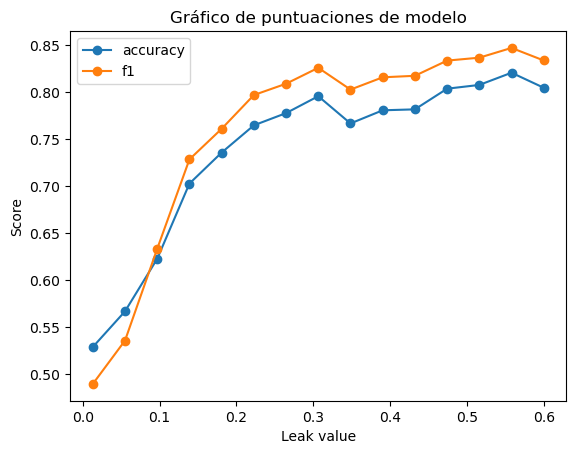

In [20]:
x_vals =    [float(key) for key in result_dict]
acc_vals =  [result_dict[key][0] for key in result_dict]
f1_vals =   [result_dict[key][1] for key in result_dict]

plt.plot(x_vals, acc_vals, label='accuracy', marker='o')
plt.plot(x_vals, f1_vals, label='f1', marker='o')

plt.xlabel('Leak value')
plt.ylabel('Score')

plt.title('Gráfico de puntuaciones de modelo')

plt.legend()

plt.show()

##### Modelo multicapa

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_complete.shape[1], 1)),
    tf.keras.layers.LSTM(25, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(40, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(60, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x = X_train_complete,
    y = y_train_complete,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

result_dict = {}
for case in data_dict:
    leak_value = data_dict[case]['leak_value']
    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    test_accuracy = accuracy_score(y_test, y_pred)
    test_leak_delay = leak_detection_delay(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    result_dict[leak_value] = (test_accuracy, test_f1, test_leak_delay)

display(pd.DataFrame.from_dict(
    data = result_dict,
    orient = 'index',
    columns = ['accuracy_score', 'f1_score', 'leak_detection_delay']
))

,accuracy_score,f1_score,leak_detection_delay
0.013000,0.527,0.459429,-495
0.054929,0.559,0.500566,-495
0.096857,0.626,0.622222,-495
0.138786,0.712,0.727273,-489
0.180714,0.753,0.771508,-489
0.222643,0.771,0.798593,-489
0.264571,0.794,0.818342,-494
0.306500,0.815,0.838428,-495
0.348429,0.788,0.816609,-490
0.390357,0.801,0.830060,-492


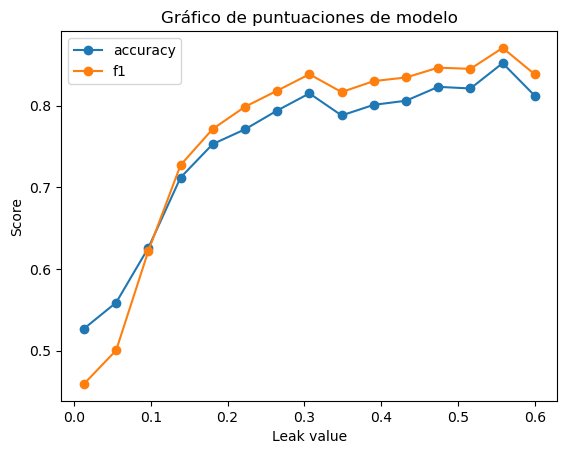

In [29]:
x_vals =    [float(key) for key in result_dict]
acc_vals =  [result_dict[key][0] for key in result_dict]
f1_vals =   [result_dict[key][1] for key in result_dict]

plt.plot(x_vals, acc_vals, label='accuracy', marker='o')
plt.plot(x_vals, f1_vals, label='f1', marker='o')

plt.xlabel('Leak value')
plt.ylabel('Score')

plt.title('Gráfico de puntuaciones de modelo')

plt.legend()

plt.show()

#### Múltiples modelos de _Deep Learning_

In [23]:
result_dict = {}
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = data_dict[case]['leak_value']

    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    test_accuracy = accuracy_score(y_test, y_pred)
    test_leak_delay = leak_detection_delay(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    result_dict[leak_value] = (test_accuracy, test_f1, test_leak_delay)
    # model.save(f'../../pkl/models/{case}.keras')

display(pd.DataFrame.from_dict(
    data = result_dict,
    orient = 'index',
    columns = ['accuracy_score', 'f1_score', 'leak_detection_delay']
))

,accuracy_score,f1_score,leak_detection_delay
0.013000,0.496,0.640514,-494
0.054929,0.636,0.654649,-495
0.096857,0.522,0.175862,-459
0.138786,0.640,0.553350,-478
0.180714,0.685,0.602774,-489
0.222643,0.663,0.693915,-492
0.264571,0.473,0.558256,-495
0.306500,0.801,0.804326,-490
0.348429,0.690,0.646119,-485
0.390357,0.631,0.616025,-493


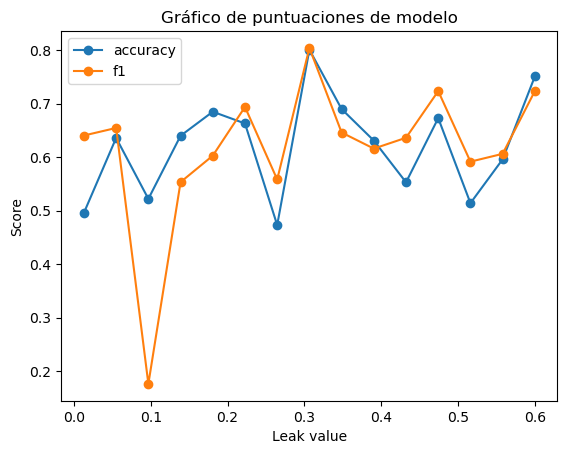

In [24]:
x_vals =    [float(key) for key in result_dict]
acc_vals =  [result_dict[key][0] for key in result_dict]
f1_vals =   [result_dict[key][1] for key in result_dict]

plt.plot(x_vals, acc_vals, label='accuracy', marker='o')
plt.plot(x_vals, f1_vals, label='f1', marker='o')

plt.xlabel('Leak value')
plt.ylabel('Score')

plt.title('Gráfico de puntuaciones de modelo')

plt.legend()

plt.show()